In [1]:
# https://www.kaggle.com/datasets/bikashpandey17/hand-sign-recognition?select=img_pixels.csv

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # using 20% of the data for validation

# Prepare the data for training
train_generator = train_datagen.flow_from_directory(
    'original_images/original_images/', # This is the path to the unzipped dataset directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # Set as training data

# Prepare the data for validation
validation_generator = train_datagen.flow_from_directory(
    'original_images/original_images/', # This is the path to the unzipped dataset directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # Set as validation data

2025-03-16 23:47:17.412510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742149037.437332  135731 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742149037.444564  135731 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 23:47:17.470299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 52515 images belonging to 41 classes.
Found 13120 images belonging to 41 classes.


In [3]:
train_generator.image_shape

(150, 150, 3)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
# Fix num_classes
num_classes = train_generator.num_classes  

# Step 4: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # ✅ Fix: Uses correct class count
])


# Compile the model
model.compile(loss='categorical_crossentropy',  # ✅ Ensure labels are integers
              optimizer='adam',
              metrics=['accuracy'])

# Fix steps per epoch calculations
train_steps_per_epoch = train_generator.samples // train_generator.batch_size  
validation_steps_per_epoch = validation_generator.samples // validation_generator.batch_size  

# Step 5: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch,
    verbose=1
)


/home/jonah/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1742149044.387552  135731 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2784 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/jonah/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1742149047.600816  135835 service.cc:148] XLA service 0x7e2408005b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742149047.600852  135835 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-16 23:47:27.668943: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742149048.048739  135835 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-16 23:47:28.581168: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

   2/1641 ━━━━━━━━━━━━━━━━━━━━ 1:30 55ms/step - accuracy: 0.0156 - loss: 5.0360     

I0000 00:00:1742149052.296418  135835 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1417/1641 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.7646 - loss: 0.7957

2025-03-16 23:49:52.573612: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,128,34,34]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,64,36,36]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7786 - loss: 0.7302

2025-03-16 23:50:17.502677: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-16 23:50:17.621787: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 210s 124ms/step - accuracy: 0.7786 - loss: 0.7299 - val_accuracy: 0.8295 - val_loss: 0.4273
Epoch 2/15
   1/1641 ━━━━━━━━━━━━━━━━━━━━ 1:16 46ms/step - accuracy: 0.8750 - loss: 0.1433

/home/jonah/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8750 - loss: 0.1433 - val_accuracy: 0.8297 - val_loss: 0.4231
Epoch 3/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 190s 116ms/step - accuracy: 0.9030 - loss: 0.1475 - val_accuracy: 0.8381 - val_loss: 0.3861
Epoch 4/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9062 - loss: 0.1260 - val_accuracy: 0.8379 - val_loss: 0.3858
Epoch 5/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 198s 120ms/step - accuracy: 0.9013 - loss: 0.1416 - val_accuracy: 0.8531 - val_loss: 0.3064
Epoch 6/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.8750 - loss: 0.1674 - val_accuracy: 0.8531 - val_loss: 0.3056
Epoch 7/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 191s 116ms/step - accuracy: 0.8987 - loss: 0.1413 - val_accuracy: 0.8533 - val_loss: 0.2950
Epoch 8/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9375 - loss: 0.0676 - val_accuracy: 0.8539 - val_loss: 0.2923
Epoch 9/15
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 189s 115ms/step - accuracy: 0.8980 - lo

In [6]:
model.save("hand_sign_model.h5")

In [7]:
import json

# Save class indices to a JSON file
class_indices = train_generator.class_indices
print(class_indices)
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)
print("d")

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'e1': 15, 'e2': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'k_x': 23, 'l': 24, 'm': 25, 'n': 26, 'new_line': 27, 'o': 28, 'p': 29, 'period': 30, 'q': 31, 'r': 32, 's': 33, 't': 34, 'u': 35, 'v': 36, 'w': 37, 'x': 38, 'y': 39, 'z': 40}
d


In [8]:
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Reverse mapping
class_labels = {v: k for k, v in class_indices.items()}
print(class_labels)  # Verify if index 30 exists


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'e1', 16: 'e2', 17: 'f', 18: 'g', 19: 'h', 20: 'i', 21: 'j', 22: 'k', 23: 'k_x', 24: 'l', 25: 'm', 26: 'n', 27: 'new_line', 28: 'o', 29: 'p', 30: 'period', 31: 'q', 32: 'r', 33: 's', 34: 't', 35: 'u', 36: 'v', 37: 'w', 38: 'x', 39: 'y', 40: 'z'}


2025-03-17 00:17:40.966435: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,128,34,34]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,36,36]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


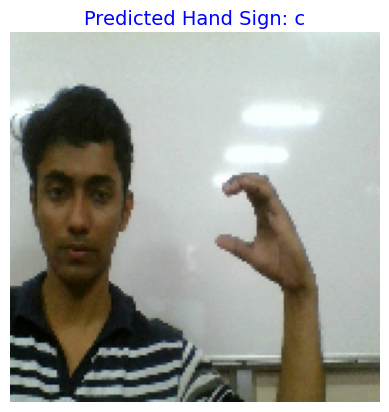

Predicted Label: c


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import json

# Load model
model = tf.keras.models.load_model("hand_sign_model.h5")

# Load class labels
with open("class_indices.json", "r") as f:
    class_labels = json.load(f)

# Reverse dictionary to map index → label
class_labels = {v: k for k, v in class_labels.items()}  

def predict_hand_sign(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get predicted index

    # Fix KeyError: use integer keys
    predicted_label = class_labels[predicted_class]  

    # Display image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Hand Sign: {predicted_label}", fontsize=14, color='blue')
    plt.show()

    return predicted_label

# 🔹 Example Usage
image_path = "original_images/original_images/c/c1.jpg"  # Replace with actual image path
predicted_label = predict_hand_sign(image_path)
print(f"Predicted Label: {predicted_label}")
